In [2]:
from collections import Counter
import random
from functools import reduce
import numpy as np
from hw6_code import Player
import matplotlib.pyplot as plt
import pdb


In [69]:
def tab(a, row, col):
    """Returns a LaTeX bmatrix
    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    s = a.shape

    first = ' '
    beg_tab = "\\begin{tabular}{||c| "
    for c in col:
        first += f"& {c} "
        beg_tab += "c "
    beg_tab += "||}"
    text = np.empty((s[0]), dtype=object)
    for i in range(s[0]):
        text[i] = f"{row[i]} "
        for j in range(s[1]):
            text[i] += f"& {a[i,j]} "
        text[i] += "\\\\"

    print("\\begin{center}")
    print(beg_tab)
    print("\\hline")
    print(f"{first}\\\\")
    print("\\hline")
    for t in text:
        print('\\hline')
        print(t)
    print("""\\hline
    \\end{tabular}
    \\end{center}
    """)


## Comparison between strategy 1

### Table

In [73]:
CI_1 = np.array([[None]*5]*5)
numRun = 1000
minScore = 0
numPlayers = 4
for i in range(1, 6):
    for j in range(i, 6):
        players=[None]*numPlayers
        for numP in range(numPlayers): players[numP] = Player(0, 0, [])
        for k in range(10):
            for player in players: player.reset_wins()
            con = []
            for l in range(numRun):
                for player in players: player.reset_score()
                winner = False
                for m in range(100):
                    players[0].total_score += players[0].strategy1(minScore, i)
                    players[1].total_score += players[1].strategy1(minScore, j)
                    for player in players:
                        if player.total_score >= 10000:
                            player.wins += 1
                            winner = True
                    if winner: break

            for player in players: player.win_prob.append(player.wins/numRun)
        CI_1[i-1,j-1] = (players[0].CI())

CI_1

array([[(0.511, 0.559), (0.26, 0.304), (0.26, 0.286), (0.306, 0.353),
        (0.355, 0.419)],
       [None, (0.509, 0.561), (0.481, 0.525), (0.572, 0.614),
        (0.627, 0.675)],
       [None, None, (0.511, 0.546), (0.588, 0.63), (0.679, 0.71)],
       [None, None, None, (0.507, 0.542), (0.59, 0.636)],
       [None, None, None, None, (0.513, 0.538)]], dtype=object)

In [74]:
tab(CI_1, [1,2,3,4,5], [1,2,3,4,5])


\begin{center}
\begin{tabular}{||c| c c c c c ||}
\hline
 & 1 & 2 & 3 & 4 & 5 \\
\hline
\hline
1 & (0.511, 0.559) & (0.26, 0.304) & (0.26, 0.286) & (0.306, 0.353) & (0.355, 0.419) \\
\hline
2 & None & (0.509, 0.561) & (0.481, 0.525) & (0.572, 0.614) & (0.627, 0.675) \\
\hline
3 & None & None & (0.511, 0.546) & (0.588, 0.63) & (0.679, 0.71) \\
\hline
4 & None & None & None & (0.507, 0.542) & (0.59, 0.636) \\
\hline
5 & None & None & None & None & (0.513, 0.538) \\
\hline
    \end{tabular}
    \end{center}
    


### Convergence grapg

In [49]:
numRun = 1000
minScore = 0
numPlayers = 2
players = [None] * numPlayers
conv = np.empty(10, dtype=object)
for numP in range(numPlayers): players[numP] = Player(0, 0, [])
for k in range(10):
    for player in players: player.reset_wins()
    con = []
    for l in range(numRun):
        for player in players: player.reset_score()
        winner = False
        for m in range(100):
            players[0].total_score += players[0].strategy1(minScore, 3)
            players[1].total_score += players[1].strategy1(minScore, 2)
            for player in players:
                if player.total_score >= 10000:
                    player.wins += 1
                    winner = True
            if winner: break

        con.append(player[0].wins/(l+1))
    conv[k] = con
    players[0].win_prob.append(player.wins / numRun)

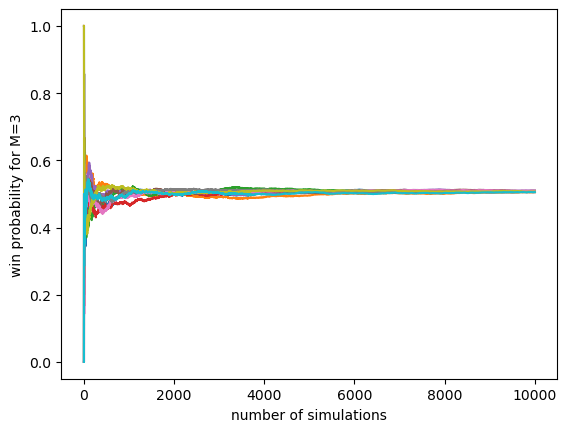

In [50]:
y = np.linspace(0, 10000+1, 10000)
fig_A = plt.figure()
for i in range(10):
    plt.plot(y,conv[i])
plt.xlabel("number of simulations")
plt.ylabel("win probability for M=3")
fig_A.savefig("conv_st1.png")

In [54]:
st1_M2_winp = players[1].win_prob
st1_M3_winp = players[0].win_prob
st1_M3_winp.sort()
st1_M3_winp

[0.5051, 0.5053, 0.5056, 0.5067, 0.507, 0.5072, 0.5088, 0.5094, 0.5099, 0.51]

### Normal distribution Histogram

In [ ]:
numRun = 1000
minScore = 0
numPlayers = 2
players = [None] * numPlayers
for numP in range(numPlayers): players[numP] = Player(0, 0, [])
for k in range(1000):
    for player in players: player.reset_wins()
    for l in range(numRun):
        for player in players: player.reset_score()
        winner = False
        for m in range(100):
            players[0].total_score += players[0].strategy1(minScore, 3)
            players[1].total_score += players[1].strategy1(minScore, 2)
            for player in players:
                if player.total_score >= 10000:
                    player.wins += 1
                    winner = True
            if winner: break
    # print(k)
    players[0].win_prob.append(player.wins / numRun)

AttributeError: 'tuple' object has no attribute 'savefig'

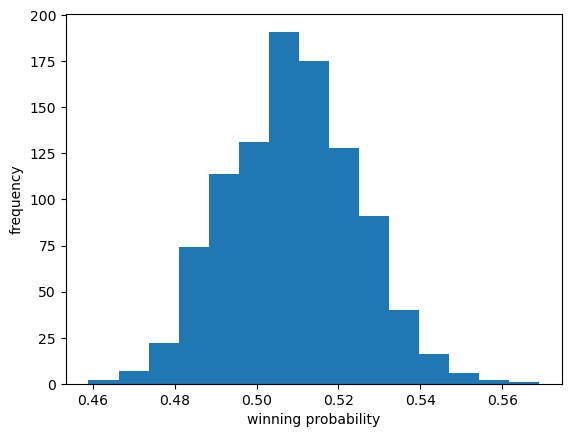

In [65]:
fig1 = plt.hist(x=players[0].win_prob, bins=15)
plt.xlabel("winning probability")
plt.ylabel("frequency")
fig1.savefig("ndist_st1.png")


## comparison between strategy 2

### Table

In [77]:
CI_2 = np.array([[None]*6]*6)
numRun = 1000
minScore = 0
numPlayers = 2
rg = [200,300,400,500,600,700]
for i in range(0,6):
    for j in range(i,6):
        players=[None]*numPlayers
        for numP in range(numPlayers): players[numP] = Player(0, 0, [])
        for k in range(10):
            for player in players: player.reset_wins()
            for l in range(numRun):
                for player in players: player.reset_score()
                winner = False
                for m in range(100):
                    players[0].total_score += players[0].strategy2(minScore, rg[i])
                    players[1].total_score += players[1].strategy2(minScore, rg[j])
                    for player in players:
                        if player.total_score >= 10000:
                            player.wins += 1
                            winner = True
                    if winner: break
            for player in players: player.win_prob.append(player.wins/numRun)
        CI_2[i,j] = (players[0].CI())
CI_2

array([[(0.495, 0.569), (0.535, 0.572), (0.808, 0.834), (0.811, 0.864),
        (0.745, 0.782), (0.796, 0.841)],
       [None, (0.501, 0.55), (0.758, 0.812), (0.795, 0.823),
        (0.721, 0.769), (0.777, 0.811)],
       [None, None, (0.488, 0.55), (0.515, 0.56), (0.477, 0.527),
        (0.541, 0.562)],
       [None, None, None, (0.497, 0.551), (0.447, 0.489), (0.499, 0.536)],
       [None, None, None, None, (0.472, 0.539), (0.525, 0.592)],
       [None, None, None, None, None, (0.487, 0.557)]], dtype=object)

In [78]:
tab(CI_2, rg, rg)

\begin{center}
\begin{tabular}{||c| c c c c c c ||}
\hline
 & 200 & 300 & 400 & 500 & 600 & 700 \\
\hline
\hline
200 & (0.495, 0.569) & (0.535, 0.572) & (0.808, 0.834) & (0.811, 0.864) & (0.745, 0.782) & (0.796, 0.841) \\
\hline
300 & None & (0.501, 0.55) & (0.758, 0.812) & (0.795, 0.823) & (0.721, 0.769) & (0.777, 0.811) \\
\hline
400 & None & None & (0.488, 0.55) & (0.515, 0.56) & (0.477, 0.527) & (0.541, 0.562) \\
\hline
500 & None & None & None & (0.497, 0.551) & (0.447, 0.489) & (0.499, 0.536) \\
\hline
600 & None & None & None & None & (0.472, 0.539) & (0.525, 0.592) \\
\hline
700 & None & None & None & None & None & (0.487, 0.557) \\
\hline
    \end{tabular}
    \end{center}
    


### Convergence Graph

In [89]:
numRun = 10000
minScore = 0
numPlayers = 2
players = [None] * numPlayers
conv = np.empty(10, dtype=object)
for numP in range(numPlayers): players[numP] = Player(0, 0, [])
for k in range(10):
    for player in players: player.reset_wins()
    con = []
    for l in range(numRun):
        for player in players: player.reset_score()
        winner = False
        for m in range(100):
            players[0].total_score += players[0].strategy2(minScore, 200)
            players[1].total_score += players[1].strategy2(minScore, 300)
            for player in players:
                if player.total_score >= 10000:
                    player.wins += 1
                    winner = True
            if winner: break

        con.append(players[0].wins/(l+1))
    conv[k] = con
    players[0].win_prob.append(players[0].wins / numRun)

In [ ]:
y = np.linspace(0, numRun+1, numRun)
fig_B = plt.figure()
for i in range(10):
    plt.plot(y,conv[i])
plt.xlabel("number of simulations")
plt.ylabel("win probability for M=200")
fig_B.savefig("conv_st2.png")

In [ ]:
st2_S200_winp = players[0].win_prob
st2_S300_winp = players[1].win_prob
st2_S200_winp.sort()
st2_S200_winp

### Normal Distribution Histogram

In [92]:
numRun = 1000
minScore = 0
numPlayers = 2
players = [None] * numPlayers
for numP in range(numPlayers): players[numP] = Player(0, 0, [])
for k in range(1000):
    for player in players: player.reset_wins()
    for l in range(numRun):
        for player in players: player.reset_score()
        winner = False
        for m in range(100):
            players[0].total_score += players[0].strategy2(minScore, 200)
            players[1].total_score += players[1].strategy2(minScore, 300)
            for player in players:
                if player.total_score >= 10000:
                    player.wins += 1
                    winner = True
            if winner: break
    # print(k)
    players[0].win_prob.append(player[0].wins / numRun)

AttributeError: 'tuple' object has no attribute 'savefig'

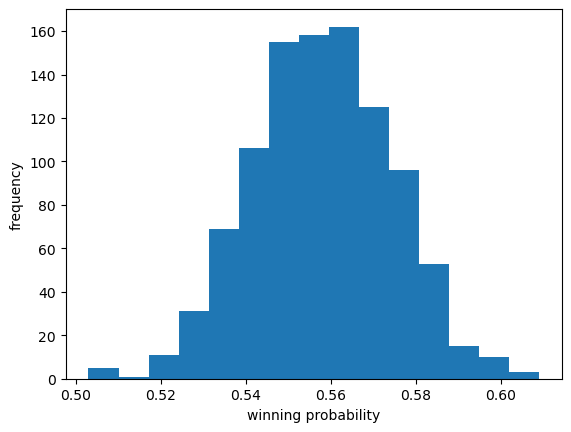

In [93]:
fig2 = plt.hist(x=players[0].win_prob, bins=15)
plt.xlabel("winning probability")
plt.ylabel("frequency")
fig2.savefig("ndist_st2.png")

## Comparison between strategy 3

### Table

In [ ]:
CI_3 = np.array([[None]*4]*4)
numRun = 10000
minScore = 0
numPlayers = 2
rg = [(200, 2), (200, 3), (300, 2), (300, 3)]
for i in range(0,4):
    for j in range(i,4):
        players=[None]*numPlayers
        for numP in range(numPlayers): players[numP] = Player(0, 0, [])
        for k in range(10):
            for player in players: player.reset_wins()
            for l in range(numRun):
                for player in players: player.reset_score()
                winner = False
                for m in range(100):
                    players[0].total_score += players[0].strategy3(minScore, rg[i][0], rg[i][1])
                    players[1].total_score += players[1].strategy3(minScore, rg[j][0], rg[j][1])
                    for player in players:
                        if player.total_score >= 10000:
                            player.wins += 1
                            winner = True
                    if winner: break
            for player in players: player.win_prob.append(player.wins/numRun)
        CI_3[i,j] = (players[0].CI())
CI_3

In [131]:
tab(CI_3, rg, rg)

\begin{center}
\begin{tabular}{||c| c c c c ||}
\hline
 & (200, 2) & (200, 3) & (300, 2) & (300, 3) \\
\hline
\hline
(200, 2) & (0.5162, 0.5332) & (0.5258, 0.5368) & (0.5061, 0.525) & (0.5042, 0.5142) \\
\hline
(200, 3) & None & (0.5255, 0.5371) & (0.5136, 0.524) & (0.5037, 0.5122) \\
\hline
(300, 2) & None & None & (0.5182, 0.5387) & (0.5133, 0.53) \\
\hline
(300, 3) & None & None & None & (0.5248, 0.5376) \\
\hline
    \end{tabular}
    \end{center}
    


### Convergence graph

In [132]:
numRun = 10000
minScore = 0
numPlayers = 2
players = [None] * numPlayers
conv = np.empty(10, dtype=object)
for numP in range(numPlayers): players[numP] = Player(0, 0, [])
for k in range(10):
    for player in players: player.reset_wins()
    con = []
    for l in range(numRun):
        for player in players: player.reset_score()
        winner = False
        for m in range(100):
            players[0].total_score += players[0].strategy3(minScore, 200, 2)
            players[1].total_score += players[1].strategy3(minScore, 200, 3)
            for player in players:
                if player.total_score >= 10000:
                    player.wins += 1
                    winner = True
            if winner: break

        con.append(players[0].wins/(l+1))
    conv[k] = con
    players[0].win_prob.append(players[0].wins / numRun)


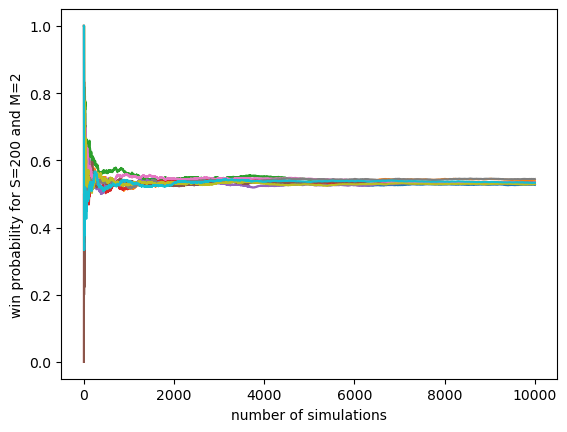

In [133]:
y = np.linspace(0, numRun+1, numRun)
fig_C = plt.figure()
for i in range(10):
    plt.plot(y,conv[i])
plt.xlabel("number of simulations")
plt.ylabel("win probability for S=200 and M=2")
fig_C.savefig("conv_st3.png")

In [137]:
st3_S200_M2_winp = players[0].win_prob
st3_S200_M2_winp.sort()
st3_S200_M2_winp

[0.5223,
 0.5252,
 0.5252,
 0.5293,
 0.5294,
 0.5294,
 0.5314,
 0.5327,
 0.5347,
 0.5351]

### N distribution histogram

In [110]:
numRun = 1000
minScore = 0
numPlayers = 2
players = [None] * numPlayers
for numP in range(numPlayers): players[numP] = Player(0, 0, [])
for k in range(1000):
    for player in players: player.reset_wins()
    for l in range(numRun):
        for player in players: player.reset_score()
        winner = False
        for m in range(100):
            players[0].total_score += players[0].strategy3(minScore, 200, 2)
            players[1].total_score += players[1].strategy3(minScore, 200, 3)
            for player in players:
                if player.total_score >= 10000:
                    player.wins += 1
                    winner = True
            if winner: break
    # print(k)
    players[0].win_prob.append(players[0].wins / numRun)

KeyboardInterrupt: 

In [ ]:
fig3 = plt.hist(x=players[0].win_prob, bins=15)
plt.xlabel("winning probability")
plt.ylabel("frequency")
fig3.savefig("ndist_st3.png")

## Comparison between Strategy 4

### Convergence graph

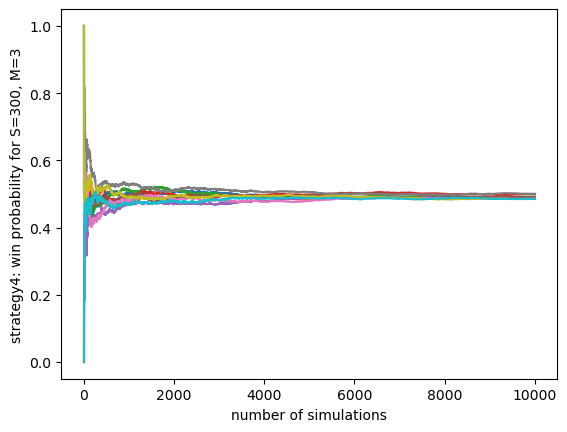

In [114]:
numRun = 10000
minScore = 0
numPlayers = 2
players = [None] * numPlayers
conv = np.empty(10, dtype=object)
for numP in range(numPlayers): players[numP] = Player(0, 0, [])
for k in range(10):
    for player in players: player.reset_wins()
    con = []
    for l in range(numRun):
        for player in players: player.reset_score()
        winner = False
        for m in range(100):
            players[0].total_score += players[0].strategy4(minScore, 3)
            players[1].total_score += players[1].strategy4(minScore, 2)
            for player in players:
                if player.total_score >= 10000:
                    player.wins += 1
                    winner = True
            if winner: break

        con.append(players[0].wins/(l+1))
    conv[k] = con
    players[0].win_prob.append(players[0].wins / numRun)
    players[1].win_prob.append(players[1].wins / numRun)


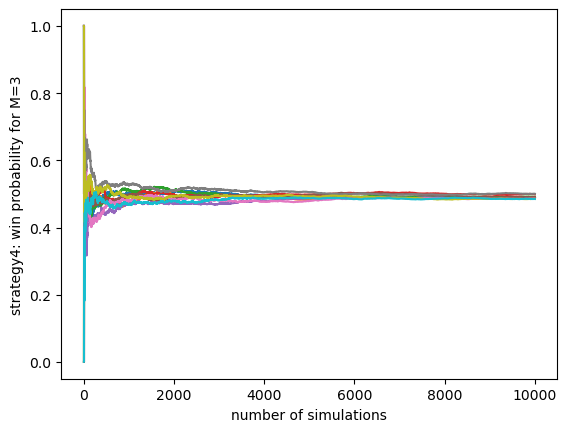

In [118]:
y = np.linspace(0, 10000+1, 10000)
fig_D = plt.figure()
for i in range(10):
    plt.plot(y,conv[i])
plt.xlabel("number of simulations")
plt.ylabel("strategy4: win probability for M=3")
fig_D.savefig("conv_st4.png")

In [119]:
st4_S300_winp = players[0].win_prob
st4_S200_winp = players[1].win_prob
st4_S300_winp.sort()
st4_S300_winp

[0.5573,
 0.5584,
 0.5664,
 0.5672,
 0.5682,
 0.5692,
 0.5704,
 0.5709,
 0.5713,
 0.5718]

## Comparison between strategy 5

### convergence graph

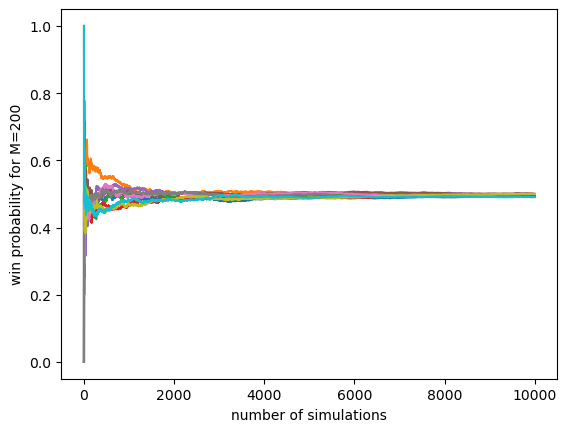

In [138]:
numRun = 10000
minScore = 0
numPlayers = 2
players = [None] * numPlayers
conv = np.empty(10, dtype=object)
for numP in range(numPlayers): players[numP] = Player(0, 0, [])
for k in range(10):
    for player in players: player.reset_wins()
    con = []
    for l in range(numRun):
        for player in players: player.reset_score()
        winner = False
        for m in range(100):
            players[0].total_score += players[0].strategy5(minScore, 200)
            players[1].total_score += players[1].strategy5(minScore, 300)
            for player in players:
                if player.total_score >= 10000:
                    player.wins += 1
                    winner = True
            if winner: break

        con.append(players[0].wins/(l+1))
    conv[k] = con
    players[0].win_prob.append(players[0].wins / numRun)
    players[1].win_prob.append(players[1].wins / numRun)

y = np.linspace(0, numRun + 1, numRun)
fig_B = plt.figure()
for i in range(10):
    plt.plot(y, conv[i])
plt.xlabel("number of simulations")
plt.ylabel("win probability for M=200")
fig_B.savefig("conv_st5.png")

In [139]:
st5_S200_winp = players[0].win_prob
st5_S300_winp = players[1].win_prob
st5_S200_winp.sort()
st5_S200_winp

[0.4903,
 0.4915,
 0.4931,
 0.4954,
 0.4965,
 0.4978,
 0.4995,
 0.4996,
 0.4998,
 0.5002]

## Comparison between strategy 6

### Convergence graph

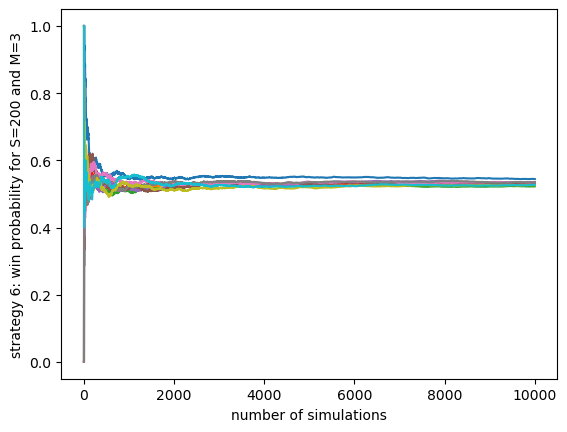

In [140]:
numRun = 10000
minScore = 0
numPlayers = 2
players = [None] * numPlayers
conv = np.empty(10, dtype=object)
for numP in range(numPlayers): players[numP] = Player(0, 0, [])
for k in range(10):
    for player in players: player.reset_wins()
    con = []
    for l in range(numRun):
        for player in players: player.reset_score()
        winner = False
        for m in range(100):
            players[0].total_score += players[0].strategy6(minScore, 200, 2)
            players[1].total_score += players[1].strategy6(minScore, 200, 3)
            for player in players:
                if player.total_score >= 10000:
                    player.wins += 1
                    winner = True
            if winner: break

        con.append(players[0].wins/(l+1))
    conv[k] = con
    players[0].win_prob.append(players[0].wins / numRun)

y = np.linspace(0, numRun+1, numRun)
fig_C = plt.figure()
for i in range(10):
    plt.plot(y,conv[i])
plt.xlabel("number of simulations")
plt.ylabel("strategy 6: win probability for S=200 and M=3")
fig_C.savefig("conv_st6.png")


In [141]:
st6_S200_M2_winp = players[0].win_prob
st6_S200_M2_winp.sort()
st6_S200_M2_winp

[0.5223,
 0.5257,
 0.5272,
 0.5295,
 0.5312,
 0.5325,
 0.5343,
 0.5348,
 0.5351,
 0.5442]

## Comparision between each strategies

### Table

In [142]:
CI_7 = np.array([[None]*6]*6)
numRun = 10000
minScore = 0
numPlayers = 2
rg = [3, 200, (200, 2), 3, 300, (200, 2)]

In [163]:
players=[None]*numPlayers
for numP in range(numPlayers): players[numP] = Player(0, 0, [])
for k in range(10):
    for player in players: player.reset_wins()
    for l in range(numRun):
        for player in players: player.reset_score()
        winner = False
        for m in range(100):
            players[0].total_score += players[0].strategy5(minScore, 300)
            players[1].total_score += players[1].strategy6(minScore, 200, 2)
            # strategy1(minScore, 3)
            # strategy2(minScore, 200)
            # strategy3(minScore, 200, 2)
            # strategy4(minScore, 3)
            # strategy5(minScore, 300)
            # strategy6(minScore, 200, 2)
            for player in players:
                if player.total_score >= 10000:
                    player.wins += 1
                    winner = True
            if winner: break
    for player in players: player.win_prob.append(player.wins/numRun)
CI_7[4,5] = (players[0].CI())
CI_7

array([[None, (0.9353, 0.9409), (0.9336, 0.942), (0.4716, 0.4845),
        (0.4829, 0.4988), (0.5103, 0.5287)],
       [None, None, (0.5232, 0.5343), (0.0621, 0.0706), (0.0689, 0.0768),
        (0.0814, 0.0921)],
       [None, None, None, (0.0623, 0.07), (0.0691, 0.0799),
        (0.0815, 0.0928)],
       [None, None, None, None, (0.5305, 0.545), (0.5632, 0.5807)],
       [None, None, None, None, None, (0.5543, 0.5688)],
       [None, None, None, None, None, None]], dtype=object)

In [164]:
tab(CI_7, rg, rg)

\begin{center}
\begin{tabular}{||c| c c c c c c ||}
\hline
 & 3 & 200 & (300, 3) & 3 & 300 & (300, 3) \\
\hline
\hline
3 & None & (0.9353, 0.9409) & (0.9336, 0.942) & (0.4716, 0.4845) & (0.4829, 0.4988) & (0.5103, 0.5287) \\
\hline
200 & None & None & (0.5232, 0.5343) & (0.0621, 0.0706) & (0.0689, 0.0768) & (0.0814, 0.0921) \\
\hline
(300, 3) & None & None & None & (0.0623, 0.07) & (0.0691, 0.0799) & (0.0815, 0.0928) \\
\hline
3 & None & None & None & None & (0.5305, 0.545) & (0.5632, 0.5807) \\
\hline
300 & None & None & None & None & None & (0.5543, 0.5688) \\
\hline
(300, 3) & None & None & None & None & None & None \\
\hline
    \end{tabular}
    \end{center}
    


In [183]:
numRun = 10000
minScore = 0
numPlayers = 6
players = [None] * numPlayers
for numP in range(numPlayers): players[numP] = Player(0, 0, [])
for k in range(10):
    for player in players: player.reset_wins()
    for l in range(numRun):
        for player in players: player.reset_score()
        winner = False
        for m in range(100):
            players[0].total_score += players[0].strategy1(minScore, 3)
            players[1].total_score += players[1].strategy2(minScore, 200)
            players[2].total_score += players[2].strategy3(minScore, 200, 2)
            players[3].total_score += players[3].strategy4(minScore, 3)
            players[4].total_score += players[4].strategy5(minScore, 300)
            players[5].total_score += players[5].strategy6(minScore, 200, 2)
            for player in players:
                if player.total_score >= 10000:
                    player.wins += 1
                    winner = True
            if winner: break

    for player in players:
        player.win_prob.append(player.wins / numRun)


In [ ]:
win_p = np.empty(6, dtype=object)
for i in range(6):
    win_p[i] = players[i].win_prob
win_p

In [191]:

numRun = 10000
minScore = 0
numPlayers = 2
players = [None] * numPlayers
conv = np.empty(10, dtype=object)
for numP in range(numPlayers): players[numP] = Player(0, 0, [])
for k in range(10):
    for player in players: player.reset_wins()
    con = []
    for l in range(numRun):
        for player in players: player.reset_score()
        winner = False
        for m in range(100):
            players[0].total_score += players[0].strategy4(minScore, 3)
            players[1].total_score += players[1].strategy5(minScore, 300)
            for player in players:
                if player.total_score >= 10000:
                    player.wins += 1
                    winner = True
            if winner: break

        con.append(players[0].wins/(l+1))
    conv[k] = con
    players[0].win_prob.append(players[0].wins / numRun)

y = np.linspace(0, numRun+1, numRun)
fig_C = plt.figure()
for i in range(10):
    plt.plot(y,conv[i])
plt.xlabel("number of simulations")
plt.ylabel("win probability for strategy 4 with M=3")
fig_C.savefig("conv_st7.png")

KeyboardInterrupt: 

In [172]:
st4_M3_winp = players[0].win_prob
st5_S300_winp = players[1].win_prob
st4_M3_winp.sort()
st4_M3_winp

[0.5335,
 0.5339,
 0.5341,
 0.5345,
 0.5354,
 0.5355,
 0.5379,
 0.5409,
 0.5411,
 0.5414]